In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_stack = pd.read_csv('bi.csv', low_memory=False)

In [3]:
nulls = df_stack.isnull().sum() / len(df_stack) * 100

print("Percentual of Null Values: ")
print(nulls.sort_values(ascending=False))

Percentual of Null Values: 
HackathonReasons            74.011431
ConvertedSalary             51.745486
FrameworkWorkedWith         47.782105
TimeFullyProductive         47.527186
FrameworkDesireNextYear     44.142431
CommunicationTools          42.370138
DatabaseDesireNextYear      41.836022
PlatformDesireNextYear      37.936371
Gender                      34.784280
Age                         34.678064
StackOverflowParticipate    33.498558
PlatformWorkedWith          33.236559
DatabaseWorkedWith          32.962420
JobSatisfaction             29.921602
CompanySize                 27.640484
SkipMeals                   27.220677
HoursOutside                27.141773
Exercise                    27.056800
HoursComputer               27.031511
WakeTime                    27.018360
CheckInCode                 26.806939
LanguageDesireNextYear      25.907643
IDE                         23.728694
HopeFiveYears               23.404987
OperatingSystem             22.938648
StackOverflowRecommend

In [4]:
df_stack.nunique()

Respondent                  98855
Hobby                           2
OpenSource                      2
ConvertedSalary              7473
Country                       183
Student                         3
Employment                      6
UndergradMajor                 12
CompanySize                     8
DevType                      9568
YearsCoding                    11
YearsCodingProf                11
JobSatisfaction                 7
CareerSatisfaction              7
HopeFiveYears                   7
LastNewJob                      5
CommunicationTools           1149
TimeFullyProductive             6
HackathonReasons              127
FormalEducation                 9
LanguageWorkedWith          26678
LanguageDesireNextYear      28657
DatabaseWorkedWith           6877
DatabaseDesireNextYear      10028
PlatformWorkedWith           9320
PlatformDesireNextYear      13704
FrameworkWorkedWith          1014
FrameworkDesireNextYear      1786
IDE                          7884
OperatingSyste

C:\Users\Bhanushali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


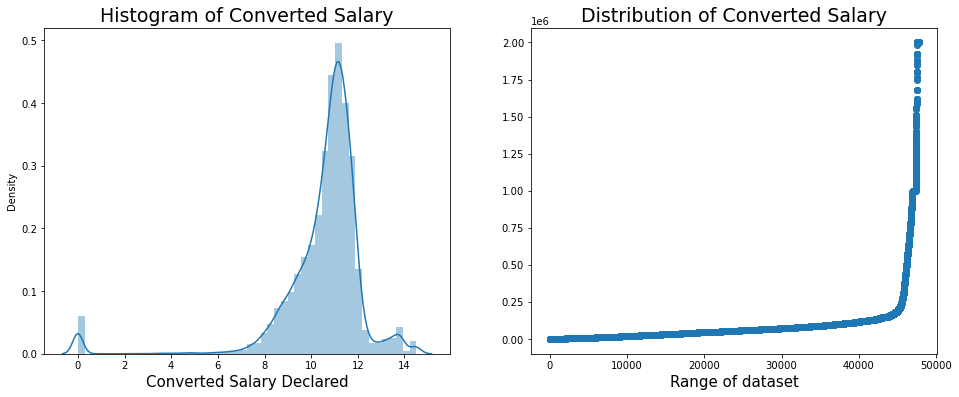

In [5]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
g = sns.distplot(np.log(df_stack['ConvertedSalary'].dropna() + 1))
g.set_xlabel('Converted Salary Declared', fontsize=15)
g.set_title("Histogram of Converted Salary", fontsize=19)

plt.subplot(1,2,2)
plt.scatter(range(df_stack.shape[0]), np.sort(df_stack['ConvertedSalary'].values))
plt.xlabel('Range of dataset', fontsize=15)
plt.title("Distribution of Converted Salary", fontsize=19)

plt.show()

In [6]:
# calculating summary statistics
data_mean, data_std = np.mean(df_stack['ConvertedSalary']), np.std(df_stack['ConvertedSalary'])

# identify outliers
cut = data_std * 3
lower, upper = data_mean - cut, data_mean + cut

# identify outliers
outliers = [x for x in df_stack['ConvertedSalary'] if x < lower or x > upper]

# remove outliers
outliers_removed = [x for x in df_stack['ConvertedSalary'] if x > lower and x < upper]

In [7]:
print('Identified outliers: %d' % len(outliers))
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 1176
Non-outlier observations: 46526


In [8]:
print("Percentiles of Amount: ")
print(df_stack['ConvertedSalary'].quantile([.05,.25,.5,.75,.95]))

Percentiles of Amount: 
0.05      3756.0
0.25     23844.0
0.50     55075.0
0.75     93000.0
0.95    215000.0
Name: ConvertedSalary, dtype: float64


In [9]:
df_stack['ConvertedSalary_log'] = np.log(df_stack['ConvertedSalary']+1)

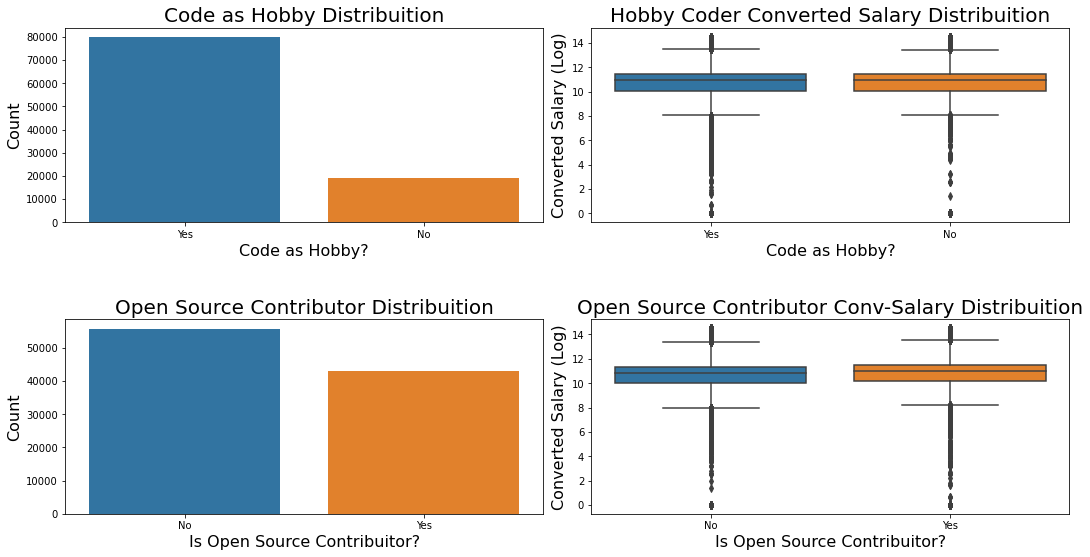

Percentual of Code as a Hobby:
Yes    80.82
No     19.18
Name: Hobby, dtype: float64

Percentual of Contribuition to OpenSource:
No     56.41
Yes    43.59
Name: OpenSource, dtype: float64


In [10]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
g = sns.countplot(x='Hobby', data=df_stack)
g.set_title("Code as Hobby Distribuition", fontsize=20)
g.set_xlabel("Code as Hobby?", fontsize=16)
g.set_ylabel("Count", fontsize=16)

plt.subplot(2,2,2)
g = sns.boxplot(x='Hobby', y='ConvertedSalary_log',data=df_stack)
g.set_title("Hobby Coder Converted Salary Distribuition", fontsize=20)
g.set_xlabel("Code as Hobby?", fontsize=16)
g.set_ylabel("Converted Salary (Log)", fontsize=16)

plt.subplot(2,2,3)
g1 = sns.countplot(x='OpenSource', data=df_stack)
g1.set_title("Open Source Contributor Distribuition", fontsize=20)
g1.set_xlabel("Is Open Source Contribuitor?", fontsize=16)
g1.set_ylabel("Count", fontsize=16)

plt.subplot(2,2,4)
g1 = sns.boxplot(x='OpenSource', y='ConvertedSalary_log', data=df_stack)
g1.set_title("Open Source Contributor Conv-Salary Distribuition", fontsize=20)
g1.set_xlabel("Is Open Source Contribuitor?", fontsize=16)
g1.set_ylabel("Converted Salary (Log)", fontsize=16)

plt.subplots_adjust(hspace = 0.5, wspace = 0.1, top = 0.8)

plt.show()

print("Percentual of Code as a Hobby:")
print(round(df_stack['Hobby'].value_counts() / len(df_stack['Hobby']) *100, 2))
print("")
print("Percentual of Contribuition to OpenSource:")
print(round(df_stack['OpenSource'].value_counts() / len(df_stack['OpenSource']) *100, 2))

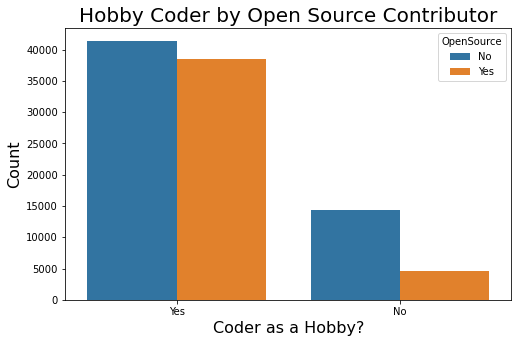

Open Source Contributor x Hobby: 

Hobby          No    Yes
OpenSource              
No          75.93  51.79
Yes         24.07  48.21


In [11]:
plt.figure(figsize=(8,5))

g = sns.countplot(x='Hobby', data=df_stack, hue='OpenSource')
g.set_title("Hobby Coder by Open Source Contributor", fontsize=20)
g.set_xlabel("Coder as a Hobby?", fontsize=16)
g.set_ylabel("Count", fontsize=16)

plt.show()

print("Open Source Contributor x Hobby: ")
print("")
print(round(pd.crosstab(df_stack['OpenSource'], df_stack['Hobby'], normalize='columns') * 100, 2))

In [12]:
countrys = df_stack['Country'].value_counts()

Description percentual of Countrys
United States         20.544231
India                 13.879925
Germany                6.533812
United Kingdom         6.293055
Canada                 3.432300
Russian Federation     2.902231
France                 2.601791
Brazil                 2.534014
Name: Country, dtype: float64


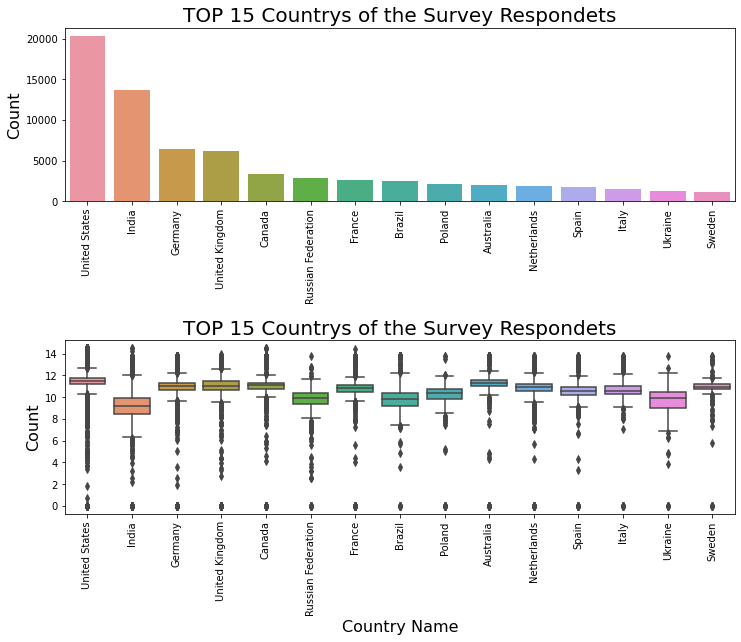

In [13]:
print("Description percentual of Countrys")
print(countrys[:8] / len(df_stack['Country']) * 100)

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
g = sns.countplot(x='Country', 
                  data=df_stack[df_stack.Country.isin(countrys[:15].index.values)], 
                  order=countrys[:15].index.values)
g.set_title("TOP 15 Countrys of the Survey Respondets", fontsize=20)
g.set_xlabel("", fontsize=16)
g.set_ylabel("Count", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='Country', y='ConvertedSalary_log',
                  data=df_stack[df_stack.Country.isin(countrys[:15].index.values)], 
                  order=countrys[:15].index.values)
g1.set_title("TOP 15 Countrys of the Survey Respondets", fontsize=20)
g1.set_xlabel("Country Name", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.8, top = 0.8)

plt.show()

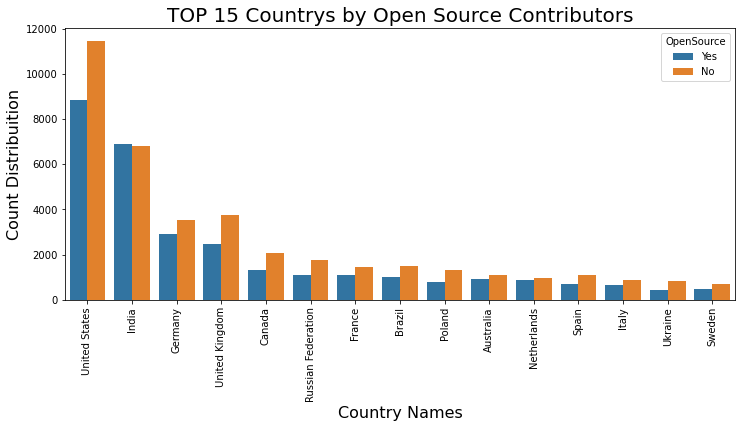

In [14]:
plt.figure(figsize=(12,5))

g = sns.countplot(x='Country', 
                  data=df_stack[df_stack.Country.isin(countrys[:15].index.values)], 
                  hue='OpenSource', order=countrys[:15].index.values)
g.set_title("TOP 15 Countrys by Open Source Contributors", fontsize=20)
g.set_xlabel("Country Names", fontsize=16)
g.set_ylabel("Count Distribuition", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

In [15]:
df_stack.groupby(["Country",'OpenSource'])['OpenSource'].count().nlargest(8) / len(df_stack['Country']) * 100

Country         OpenSource
United States   No            11.594760
                Yes            8.949471
India           Yes            6.984978
                No             6.894947
United Kingdom  No             3.794446
Germany         No             3.575945
                Yes            2.957868
United Kingdom  Yes            2.498609
Name: OpenSource, dtype: float64

In [16]:
df_stack.loc[df_stack['FormalEducation'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)', 'FormalEducation'] = 'Bachelor’s degree'
df_stack.loc[df_stack['FormalEducation'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'FormalEducation'] = "Master's Degree"
df_stack.loc[df_stack['FormalEducation'] == 'Some college/university study without earning a degree', 'FormalEducation'] = 'College/Univer without degree'
df_stack.loc[df_stack['FormalEducation'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'FormalEducation'] = 'Secondary School'
df_stack.loc[df_stack['FormalEducation'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)', 'FormalEducation'] = 'Doctoral Degree' 
df_stack.loc[df_stack['FormalEducation'] == 'Professional degree (JD, MD, etc.)', 'FormalEducation'] = 'Professional Degree'
df_stack.loc[df_stack['FormalEducation'] == 'I never completed any formal education', 'FormalEducation'] = "Never completed Formal Educ"

df_stack.loc[df_stack['Employment'] == 'Independent contractor, freelancer, or self-employed', 'Employment'] = "Independent Emp"
df_stack.loc[df_stack['Employment'] == 'Not employed, but looking for work', 'Employment'] = "NotWork, LookingFor"
df_stack.loc[df_stack['Employment'] == 'Not employed, and not looking for work', 'Employment'] = "NotWork, NotLooking"

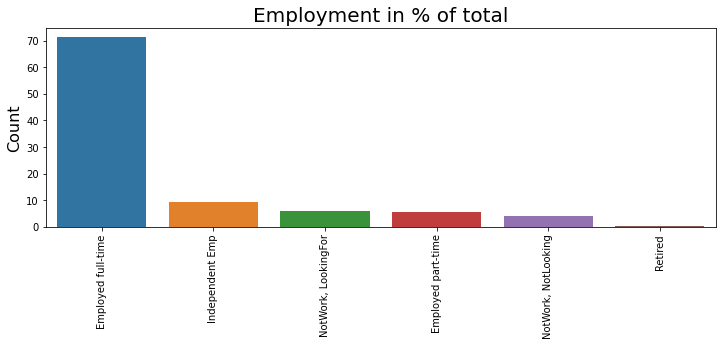

In [58]:
plt.figure(figsize=(12,10))

plt.subplot(211)
g = sns.barplot(x=employment.index, 
                y=employment.values)
g.set_title("Employment in % of total", fontsize=20)
g.set_xlabel("", fontsize=16)
g.set_ylabel("Count", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

#plt.subplot(212)
#g1 = sns.violinplot(x='Employment', y='ConvertedSalary_log', order=employment.index, data=df_stack)
#g1.set_title("Employment Salary Distribuition", fontsize=20)
#g1.set_xlabel("Employment type", fontsize=16)
#g1.set_ylabel("Conv Salary(Log)", fontsize=16)
#g1.set_xticklabels(g1.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.8, top = 0.9)

plt.show()

#print("Description percentual of Countrys")
#print(round(employment,2))

In [19]:
df_stack['YearsCodingProf'] = df_stack['YearsCodingProf'].replace({'0-2 years':'0-2', '3-5 years':'3-5', '6-8 years':'6-8', '9-11 years':'9-11', 
                                                           '12-14 years':'12-14', '15-17 years':'15-17', '18-20 years':'18-20', 
                                                           '21-23 years':'21-23', '30 or more years':'30 or more', '24-26 years':'24-26', 
                                                           '27-29 years': '27-29'})

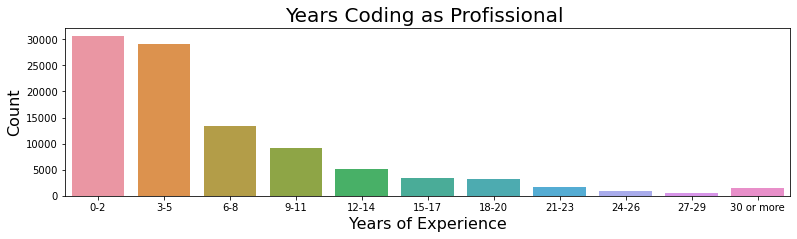

In [60]:
plt.figure(figsize=(13,9))

plt.subplot(211)
g = sns.countplot(x='YearsCodingProf', data=df_stack, 
              order=['0-2', '3-5', '6-8', '9-11', '12-14',
                     '15-17', '18-20', '21-23','24-26',  '27-29', '30 or more'])
g.set_title("Years Coding as Profissional ", fontsize=20)
g.set_xlabel("Years of Experience", fontsize=16)
g.set_ylabel("Count", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [21]:
date_int = ['Employment',"YearsCodingProf"]

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_stack[date_int[0]], df_stack[date_int[1]], normalize='columns').style.background_gradient(cmap = cm)

YearsCodingProf,0-2,12-14,15-17,18-20,21-23,24-26,27-29,3-5,30 or more,6-8,9-11
Employment,,,,,,,,,,,
Employed full-time,0.621192,0.830953,0.804391,0.805595,0.794420,0.730588,0.762475,0.841544,0.646829,0.861984,0.846195
Employed part-time,0.099415,0.019668,0.016633,0.014518,0.015419,0.014118,0.011976,0.045731,0.020360,0.023562,0.014295
Independent Emp,0.079602,0.133458,0.162009,0.161827,0.174009,0.220000,0.183633,0.076093,0.245106,0.095305,0.122833
"NotWork, LookingFor",0.122240,0.011239,0.012641,0.013456,0.011013,0.022353,0.023952,0.025506,0.025842,0.014561,0.010721
"NotWork, NotLooking",0.076896,0.003278,0.002994,0.002125,0.003671,0.007059,0.005988,0.010796,0.012529,0.004148,0.004897
Retired,0.000655,0.001405,0.001331,0.002479,0.001468,0.005882,0.011976,0.000330,0.049334,0.000441,0.001059


In [22]:
df_stack['CompanySize'] = df_stack['CompanySize'].replace({'Fewer than 10 employees': 'Fewer than 10', 
                                                           '10 to 19 employees': '10 to 19', '20 to 99 employees': '20 to 99', 
                                                           '100 to 499 employees': '100 to 499', '500 to 999 employees':'500 to 999',
                                                           '1,000 to 4,999 employees':'1,000 to 4,999', '5,000 to 9,999 employees':'5,000 to 9,999',
                                                           '10,000 or more employees': '10,000 or more'})  

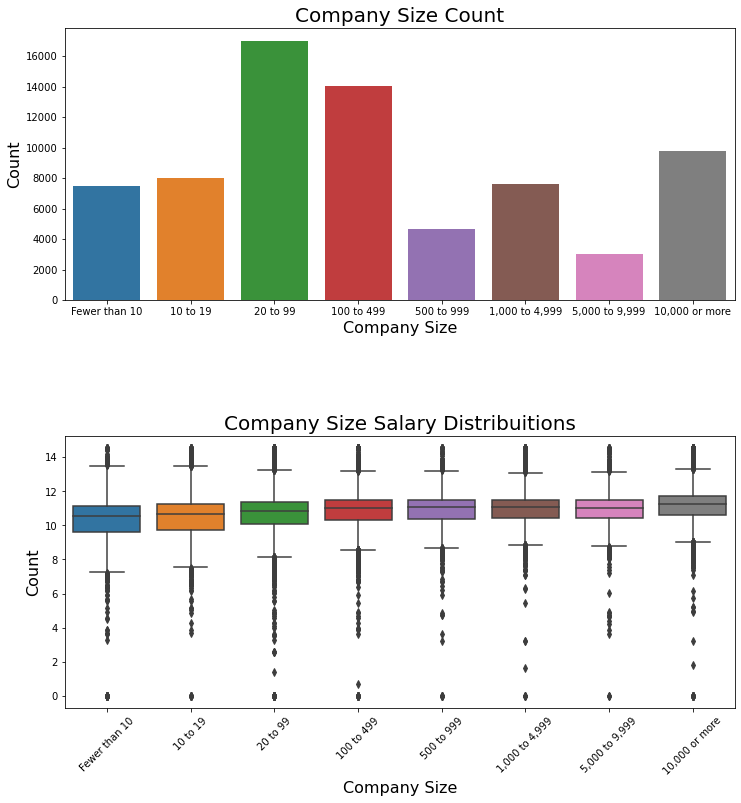

In [23]:
plt.figure(figsize=(12,14))
plt.subplot(211)
g = sns.countplot(x='CompanySize',
                  data=df_stack, order=['Fewer than 10','10 to 19','20 to 99',
                    '100 to 499','500 to 999','1,000 to 4,999', 
                    '5,000 to 9,999', '10,000 or more'])
g.set_title("Company Size Count", fontsize=20)
g.set_xlabel("Company Size", fontsize=16)
g.set_ylabel("Count", fontsize=16)

plt.subplot(212)
g1 = sns.boxplot(x='CompanySize',y='ConvertedSalary_log',
                  data=df_stack, order=['Fewer than 10','10 to 19','20 to 99',
                    '100 to 499','500 to 999','1,000 to 4,999',
                    '5,000 to 9,999', '10,000 or more'])
g1.set_title("Company Size Salary Distribuitions", fontsize=20)
g1.set_xlabel("Company Size", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.8)

plt.show()

In [24]:
date_int = ['CompanySize',"YearsCodingProf"]

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_stack[date_int[0]], df_stack[date_int[1]], normalize='columns').style.background_gradient(cmap = cm)

YearsCodingProf,0-2,12-14,15-17,18-20,21-23,24-26,27-29,3-5,30 or more,6-8,9-11
CompanySize,,,,,,,,,,,
"1,000 to 4,999",0.086820,0.129573,0.124076,0.128678,0.125000,0.117742,0.092838,0.103161,0.122892,0.116994,0.118522
10 to 19,0.139188,0.088523,0.081348,0.096179,0.094669,0.070968,0.076923,0.112901,0.079518,0.098157,0.093158
"10,000 or more",0.116888,0.150796,0.161052,0.173913,0.189338,0.212903,0.185676,0.123891,0.230120,0.143977,0.145921
100 to 499,0.176522,0.200503,0.213229,0.200264,0.181985,0.204839,0.175066,0.204472,0.187952,0.204867,0.213872
20 to 99,0.254635,0.223401,0.207888,0.199385,0.195772,0.174194,0.214854,0.251537,0.136145,0.236636,0.232034
"5,000 to 9,999",0.035768,0.049428,0.050534,0.053140,0.043199,0.054839,0.050398,0.039230,0.057831,0.045006,0.042900
500 to 999,0.052932,0.075119,0.072720,0.061924,0.064338,0.074194,0.074271,0.065292,0.061446,0.069647,0.071865
Fewer than 10,0.137246,0.082658,0.089154,0.086517,0.105699,0.090323,0.129973,0.099516,0.124096,0.084716,0.081729


Percentual of Form Education Distribuition: 
Bachelor’s degree                44.16
Master's Degree                  21.64
College/Univer without degree    11.85
Secondary School                  9.05
Associate degree                  3.00
Doctoral Degree                   2.24
Primary/elementary school         1.68
Professional Degree               1.46
Never completed Formal Educ       0.71
Name: FormalEducation, dtype: float64


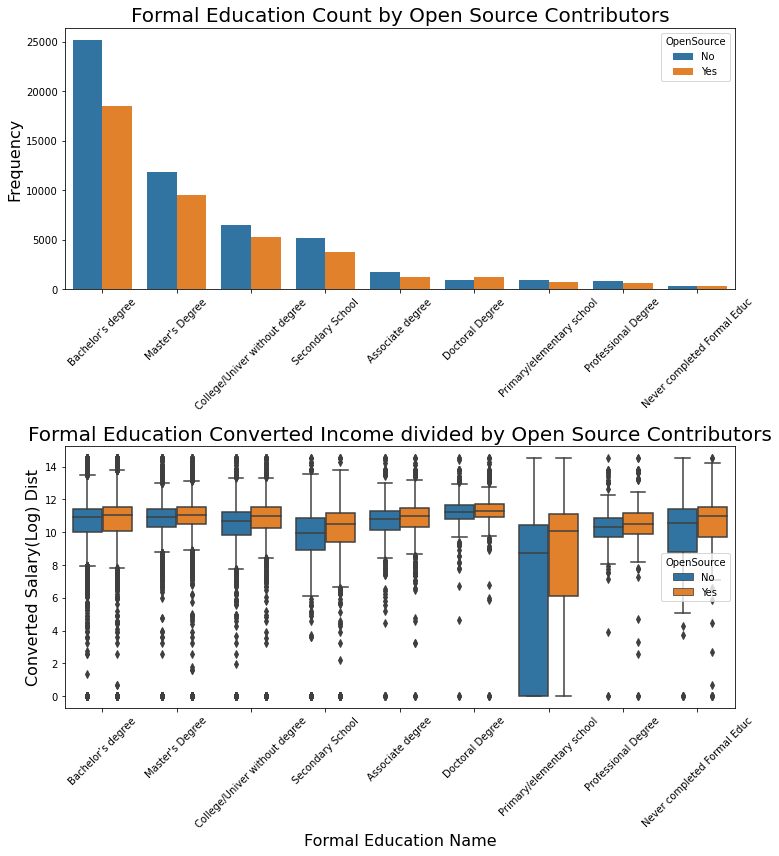

In [25]:
print("Percentual of Form Education Distribuition: ")
print(round(formal_educ, 2))

plt.figure(figsize=(12,14))
plt.subplot(211)
g = sns.countplot(x='FormalEducation', hue='OpenSource',
                  data=df_stack, order=formal_educ.index)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Formal Education Count by Open Source Contributors", fontsize=20)
g.set_xlabel("", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

plt.subplot(212)
g1 = sns.boxplot(x='FormalEducation',y='ConvertedSalary_log', hue='OpenSource',
                  data=df_stack, order=formal_educ.index)
g1.set_title("Formal Education Converted Income divided by Open Source Contributors", fontsize=20)
g1.set_xlabel("Formal Education Name", fontsize=16)
g1.set_ylabel("Converted Salary(Log) Dist", fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [26]:
date_int = ['FormalEducation',"YearsCodingProf"]

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_stack[date_int[0]], df_stack[date_int[1]], normalize='index').style.background_gradient(cmap = cm)

YearsCodingProf,0-2,12-14,15-17,18-20,21-23,24-26,27-29,3-5,30 or more,6-8,9-11
FormalEducation,,,,,,,,,,,
Associate degree,0.318847,0.064354,0.044296,0.037610,0.016715,0.010447,0.010865,0.254074,0.020059,0.137066,0.085667
Bachelor’s degree,0.294179,0.050695,0.034292,0.032723,0.015908,0.009330,0.005780,0.302876,0.013320,0.148397,0.092500
College/Univer without degree,0.326890,0.053503,0.043251,0.047736,0.025523,0.016766,0.007903,0.232806,0.022533,0.125801,0.097287
Doctoral Degree,0.103255,0.067901,0.067340,0.084175,0.033670,0.023569,0.014590,0.189113,0.053872,0.198653,0.163861
Master's Degree,0.185503,0.073775,0.047371,0.039466,0.018556,0.012726,0.006335,0.288822,0.018163,0.183709,0.125575
Never completed Formal Educ,0.357143,0.037946,0.069196,0.020089,0.029018,0.011161,0.006696,0.227679,0.055804,0.098214,0.087054
Primary/elementary school,0.674797,0.025407,0.024390,0.017276,0.007114,0.004065,0.000000,0.134146,0.008130,0.054878,0.049797
Professional Degree,0.235772,0.076784,0.040650,0.043360,0.012647,0.011743,0.006323,0.286360,0.026197,0.163505,0.096658
Secondary School,0.588273,0.027211,0.025591,0.023971,0.010042,0.005345,0.005831,0.188371,0.008260,0.071753,0.045351


In [27]:
date_int = ['FormalEducation',"CareerSatisfaction"]

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_stack[date_int[0]], df_stack[date_int[1]], normalize='index').style.background_gradient(cmap = cm)

CareerSatisfaction,Extremely dissatisfied,Extremely satisfied,Moderately dissatisfied,Moderately satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied
FormalEducation,,,,,,,
Associate degree,0.038217,0.220382,0.067941,0.340977,0.087473,0.078132,0.166879
Bachelor’s degree,0.032520,0.187558,0.069074,0.368561,0.071819,0.087925,0.182544
College/Univer without degree,0.037411,0.189655,0.067122,0.352093,0.084689,0.091954,0.177077
Doctoral Degree,0.022096,0.208499,0.065156,0.443626,0.064023,0.066856,0.129745
Master's Degree,0.031357,0.172433,0.069315,0.388573,0.069713,0.087753,0.180856
Never completed Formal Educ,0.127660,0.215130,0.087470,0.217494,0.115839,0.096927,0.139480
Primary/elementary school,0.060988,0.198738,0.062040,0.256572,0.241851,0.059937,0.119874
Professional Degree,0.043884,0.193277,0.090570,0.338936,0.071895,0.101774,0.159664
Secondary School,0.031943,0.191493,0.063555,0.327375,0.147799,0.074148,0.163688


In [29]:
age_order = ['Under 18 years old','18 - 24 years old','25 - 34 years old',
             '35 - 44 years old','45 - 54 years old','55 - 64 years old', 
             '65 years or older']

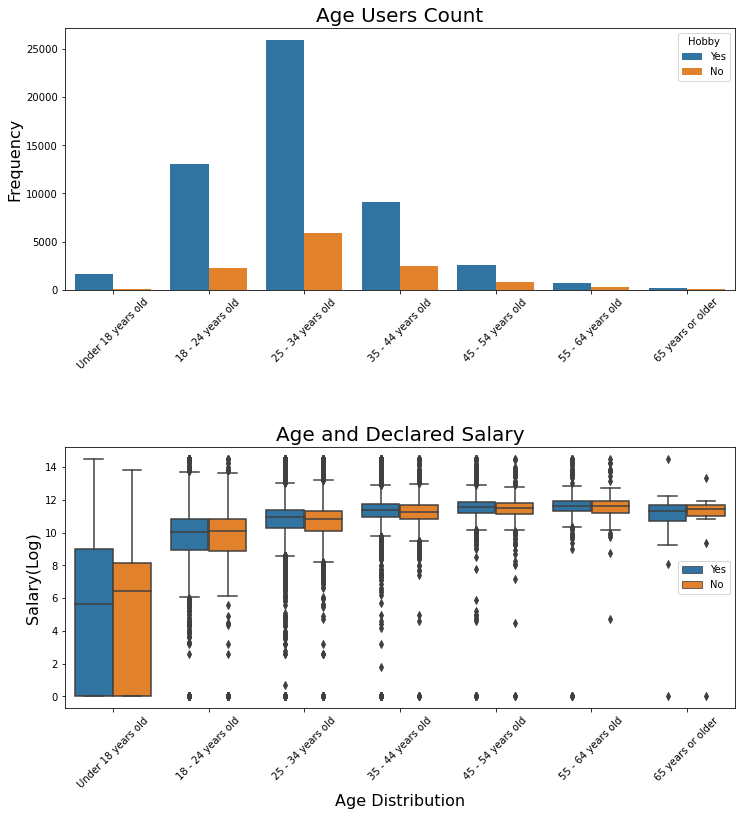

In [30]:
plt.figure(figsize=(12,14))
plt.subplot(211)
g = sns.countplot(x='Age', hue='Hobby',
                  data=df_stack, order=age_order)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Age Users Count", fontsize=20)
g.set_xlabel("", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

plt.subplot(212)
g1 = sns.boxplot(x='Age',y='ConvertedSalary_log', hue="Hobby",
                  data=df_stack, order=age_order)
g1.set_title("Age and Declared Salary", fontsize=20)
g1.set_xlabel("Age Distribution", fontsize=16)
g1.set_ylabel("Salary(Log)", fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.legend(loc=5)
plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [68]:
date_int = ['YearsCodingProf',"StackOverflowParticipate"]

cm = sns.light_palette("lightblue", as_cmap=True)
pd.crosstab(df_stack[date_int[0]], df_stack[date_int[1]], normalize='columns').style.background_gradient(cmap = cm)

StackOverflowParticipate,A few times per month or weekly,A few times per week,Daily or almost daily,I have never participated in Q&A on Stack Overflow,Less than once per month or monthly,Multiple times per day
YearsCodingProf,,,,,,
0-2,0.267153,0.393727,0.259854,0.382988,0.279754,0.233956
12-14,0.060226,0.046187,0.054197,0.040687,0.056345,0.053650
15-17,0.037718,0.027368,0.045985,0.025694,0.037454,0.046520
18-20,0.035444,0.028721,0.038869,0.025996,0.035975,0.044143
21-23,0.018480,0.015006,0.018796,0.010580,0.016071,0.031239
24-26,0.010188,0.007811,0.011496,0.008403,0.009692,0.016638
27-29,0.008434,0.003444,0.006752,0.004836,0.005530,0.010187
3-5,0.296010,0.259041,0.297263,0.311045,0.302533,0.294397
30 or more,0.015116,0.013776,0.020985,0.013119,0.014538,0.030900


In [37]:
date_int = ['StackOverflowVisit',"StackOverflowHasAccount"]

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_stack[date_int[0]], df_stack[date_int[1]], normalize='columns').style.background_gradient(cmap = cm)

StackOverflowHasAccount,I'm not sure / I can't remember,No,Yes
StackOverflowVisit,,,
A few times per month or weekly,0.198276,0.180366,0.098933
A few times per week,0.278921,0.286890,0.202545
Daily or almost daily,0.268632,0.274059,0.310375
I have never visited Stack Overflow (before today),0.007786,0.010047,0.067312
Less than once per month or monthly,0.056174,0.037042,0.016230
Multiple times per day,0.190211,0.211597,0.304605


In [54]:
date_int = ['StackOverflowVisit',"Employment"]

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_stack[date_int[0]], df_stack[date_int[1]], normalize='columns').style.background_gradient(cmap = cm)

Employment,Employed full-time,Employed part-time,Independent Emp,"NotWork, LookingFor","NotWork, NotLooking",Retired
StackOverflowVisit,,,,,,
A few times per month or weekly,0.098118,0.110772,0.118035,0.161869,0.181111,0.211538
A few times per week,0.202533,0.220108,0.221626,0.254107,0.274716,0.219231
Daily or almost daily,0.317358,0.300718,0.290033,0.258478,0.242743,0.173077
I have never visited Stack Overflow (before today),0.050984,0.087253,0.074082,0.093745,0.091292,0.150000
Less than once per month or monthly,0.016388,0.018671,0.018675,0.036172,0.041439,0.073077
Multiple times per day,0.314620,0.262478,0.277548,0.195629,0.168700,0.173077


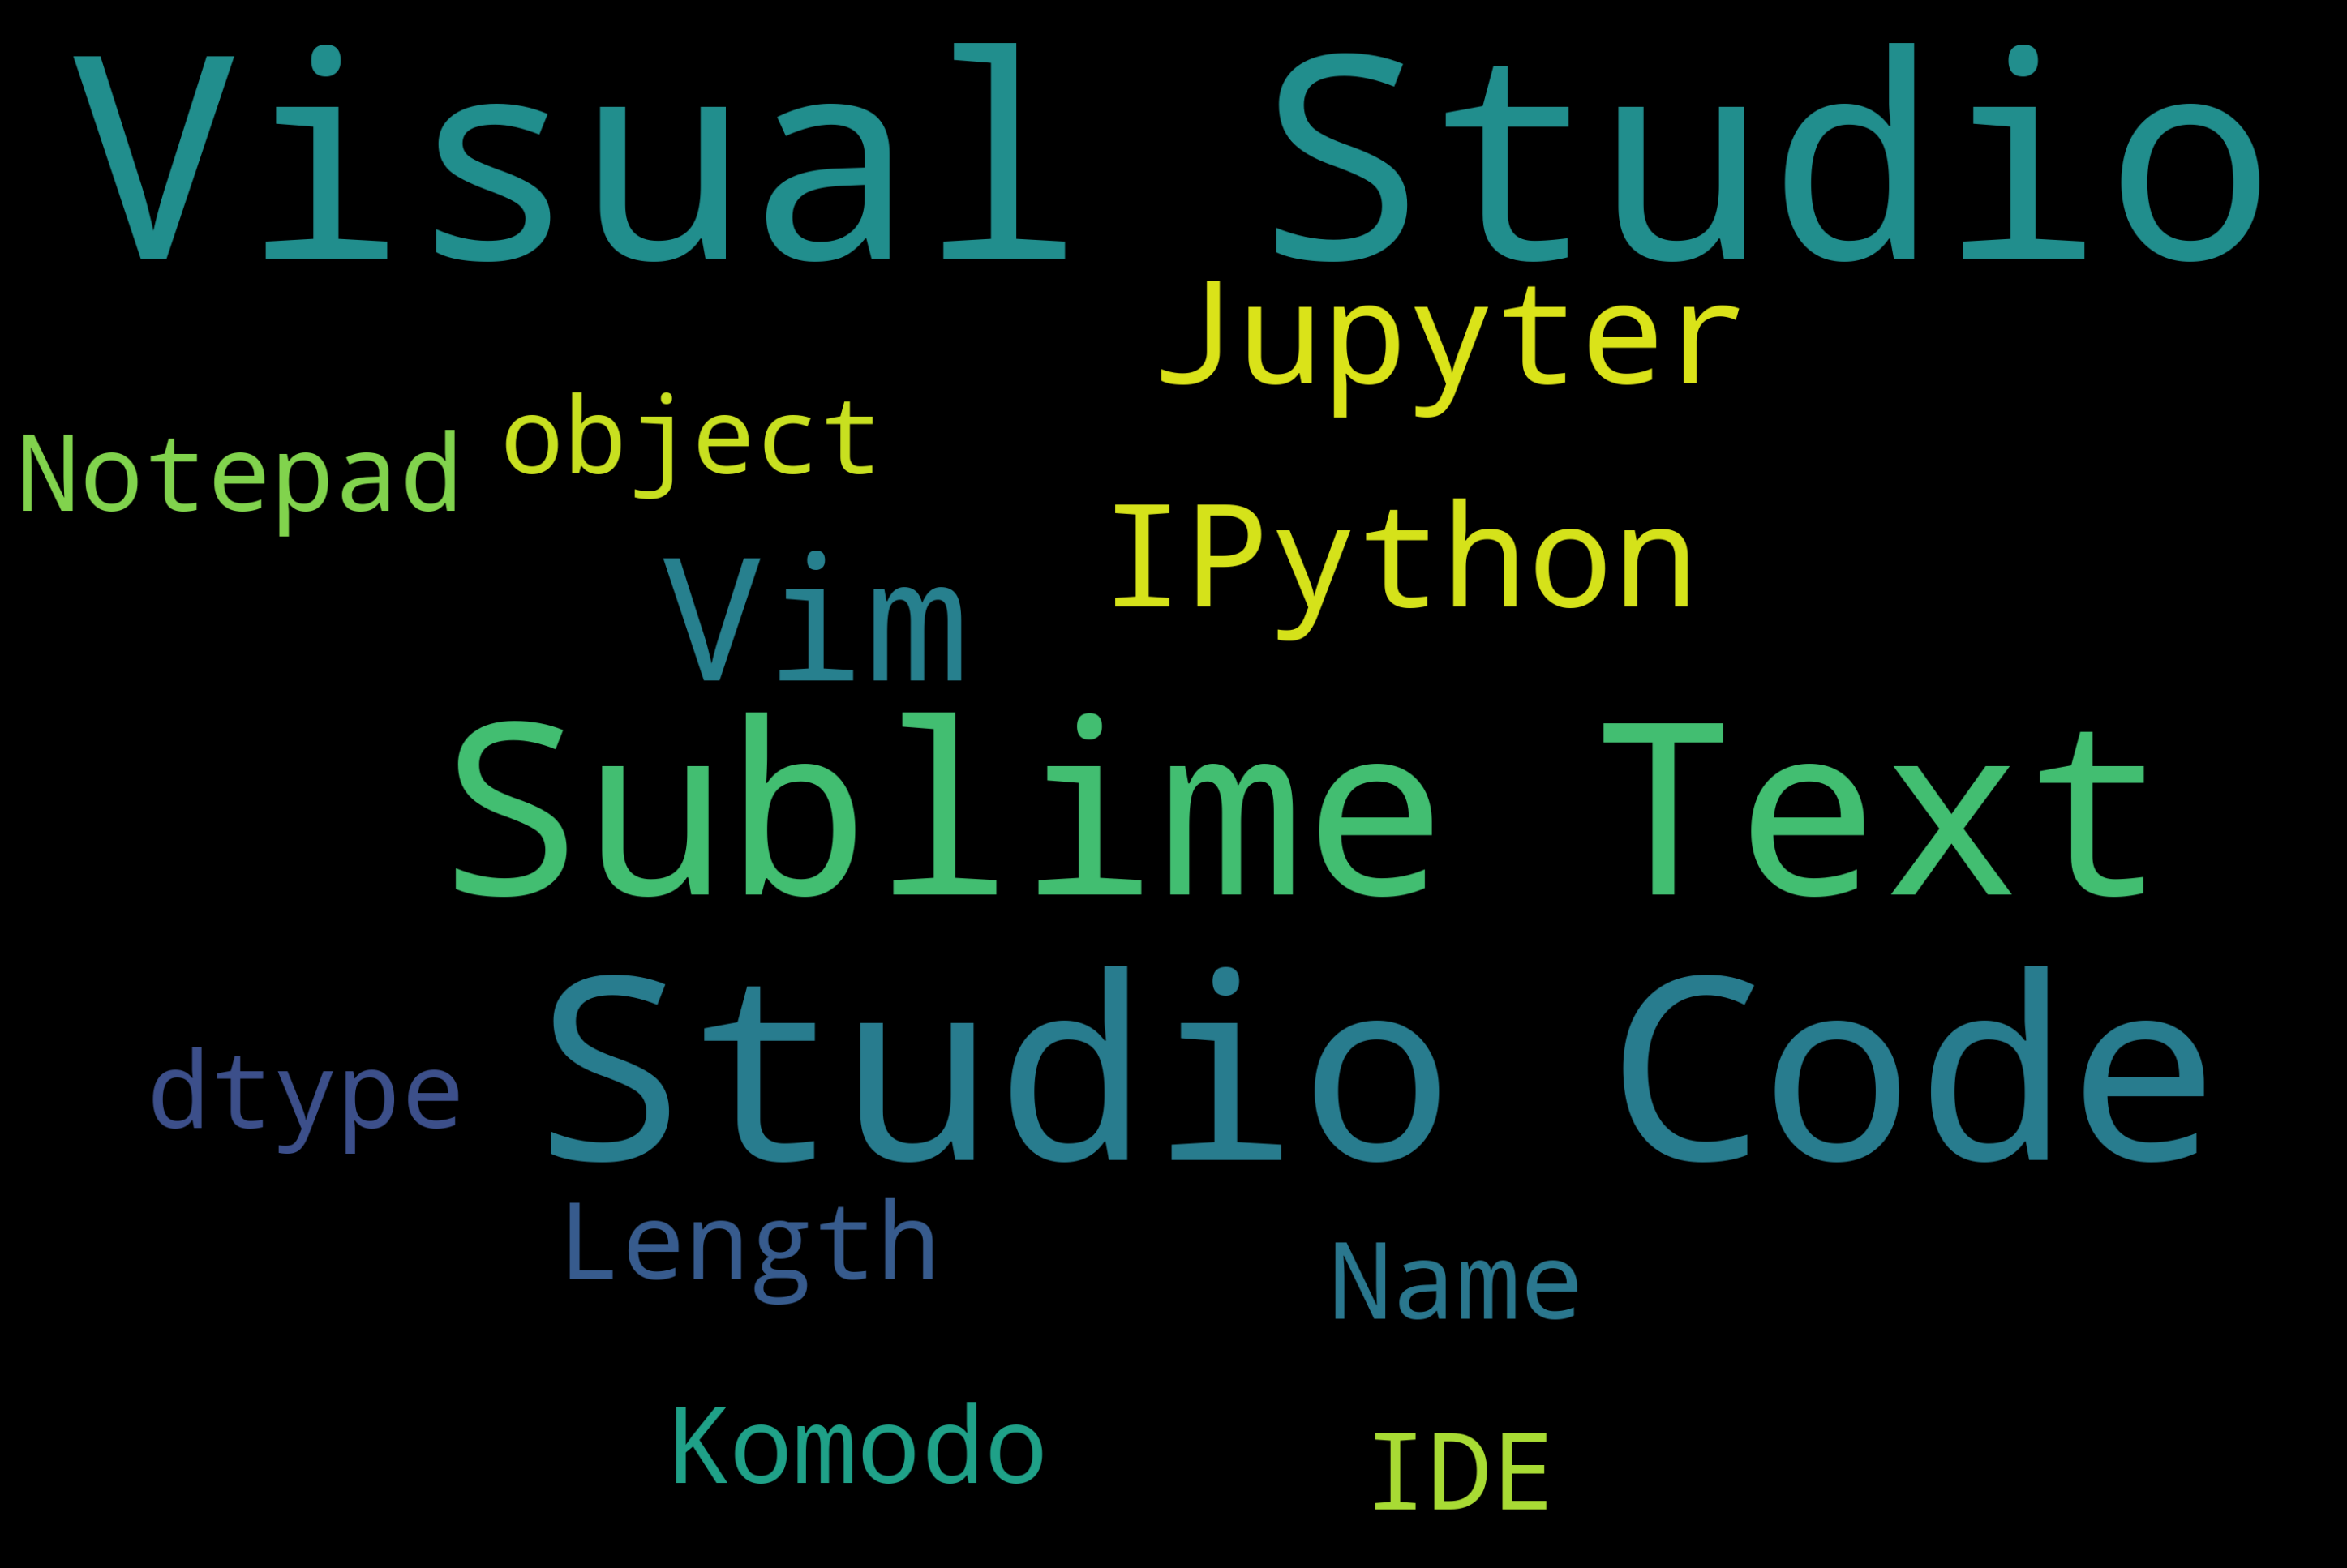

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_stack.IDE
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

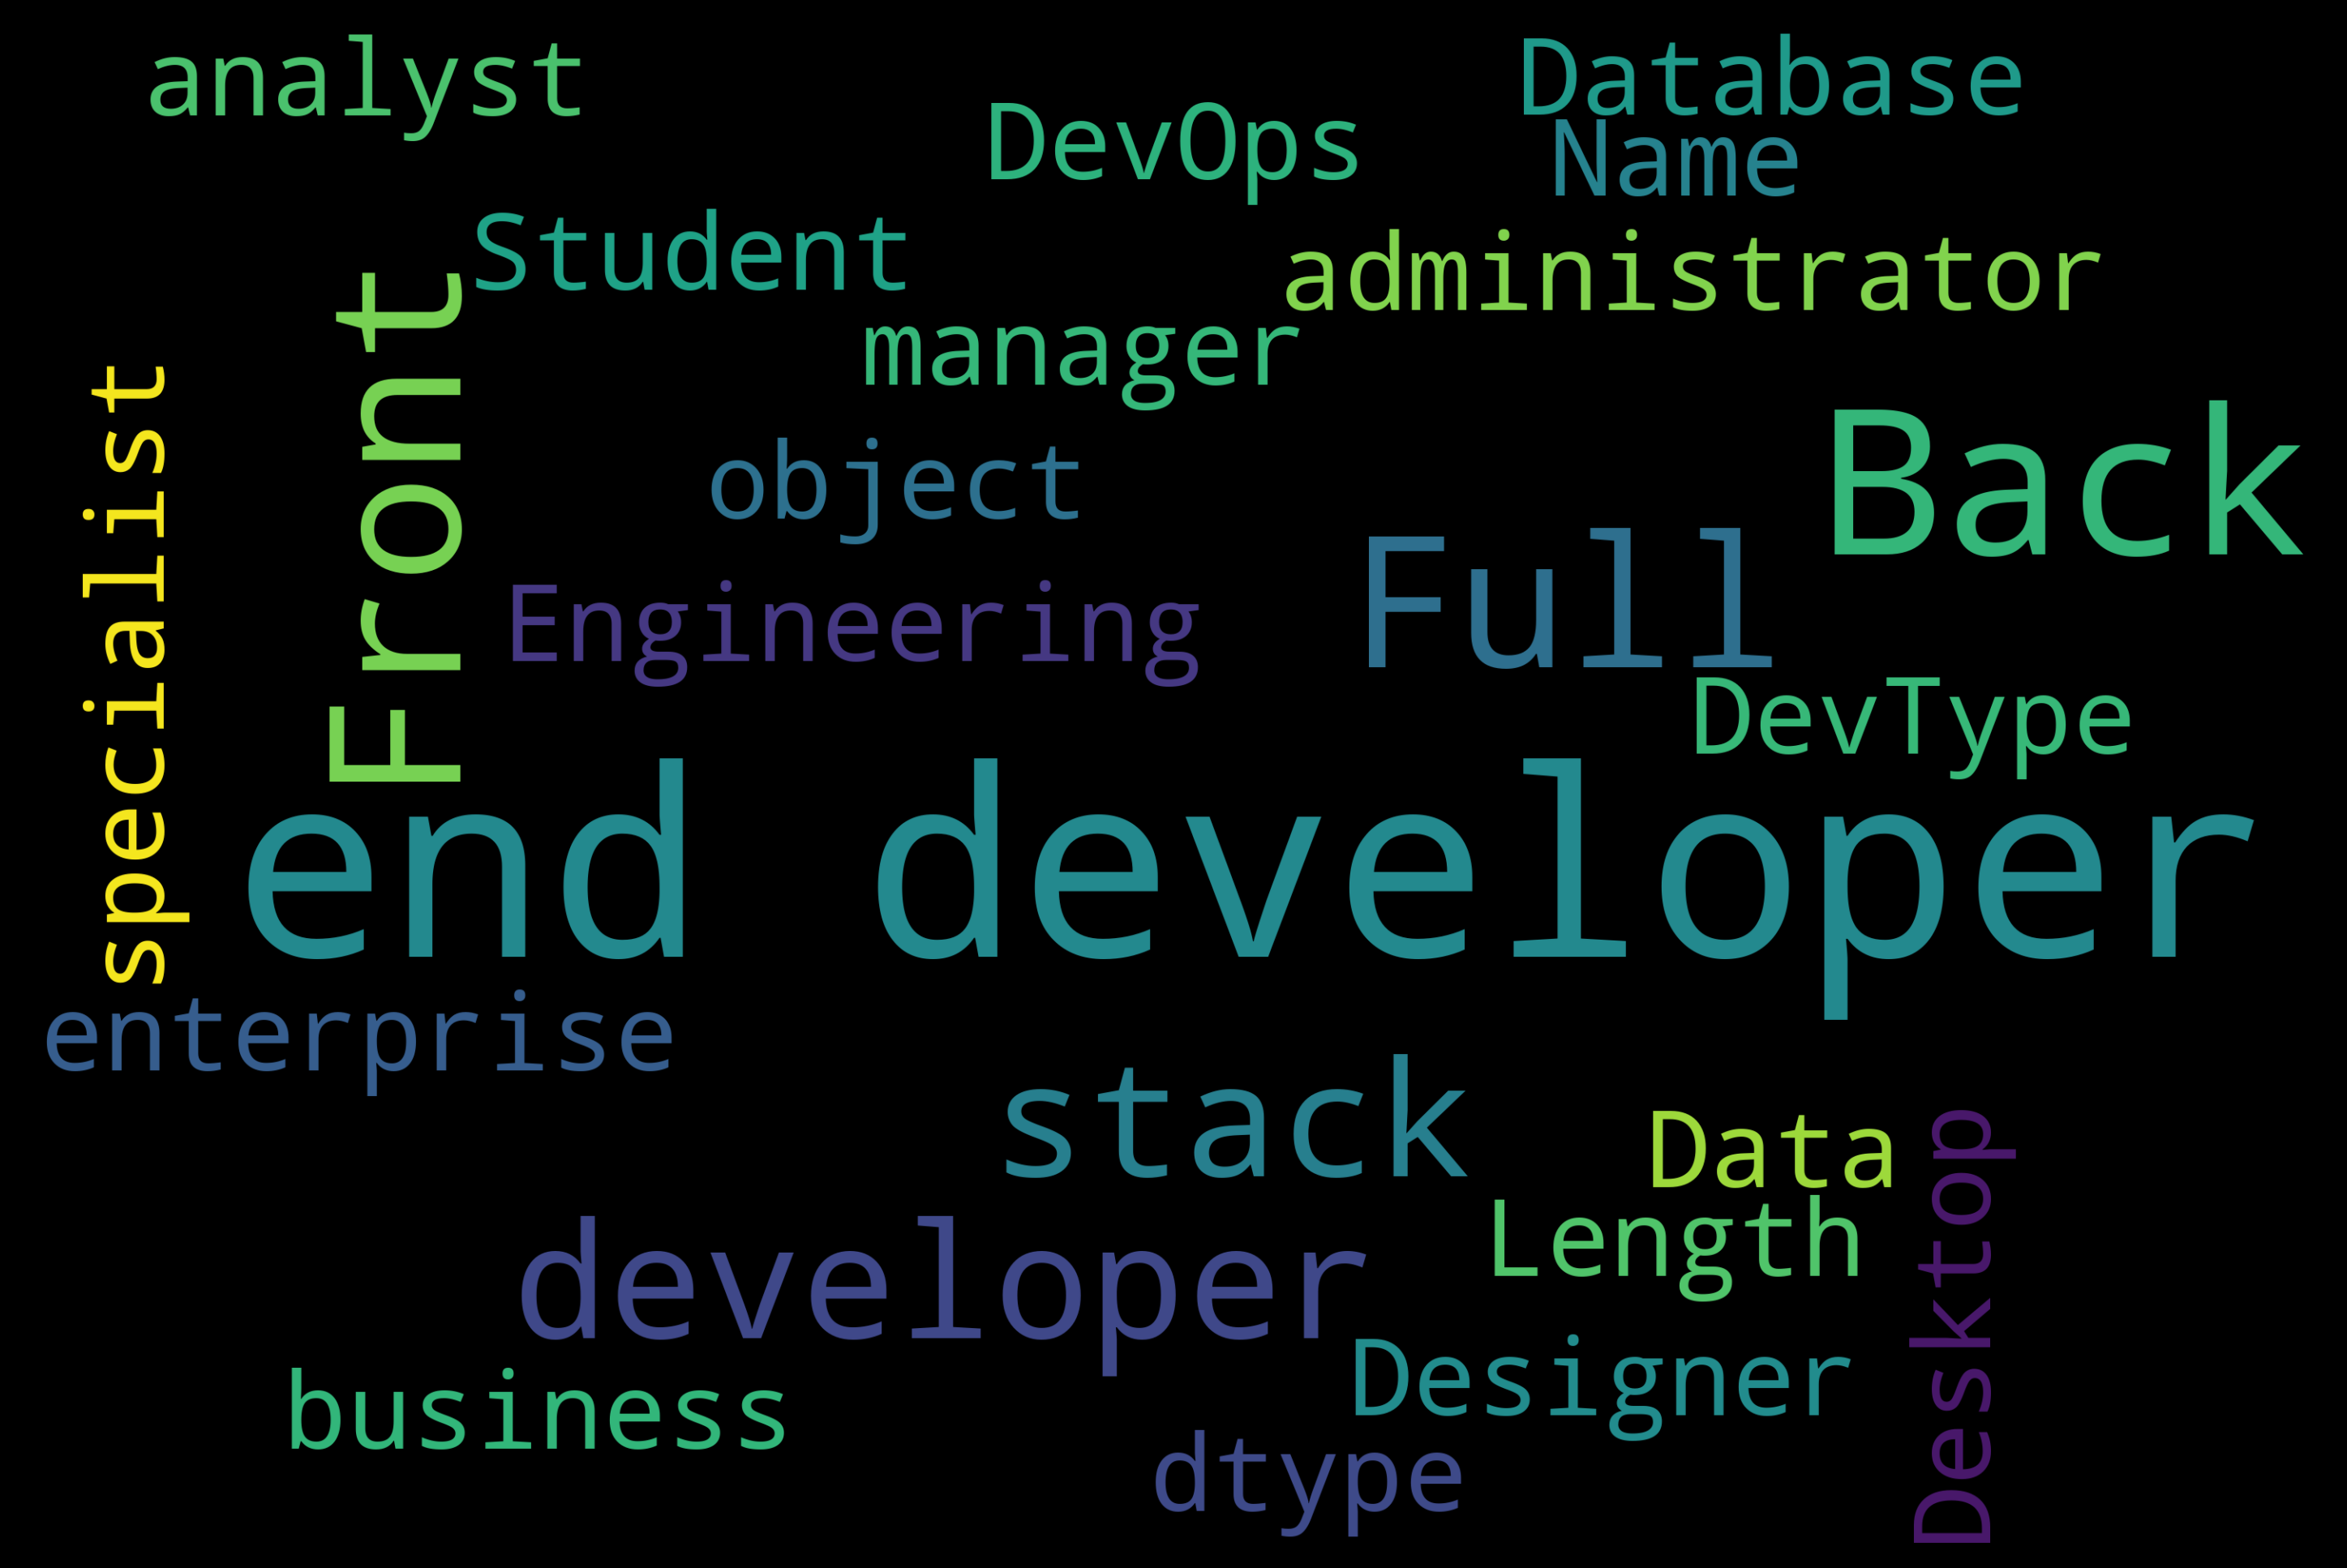

In [48]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_stack.DevType
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

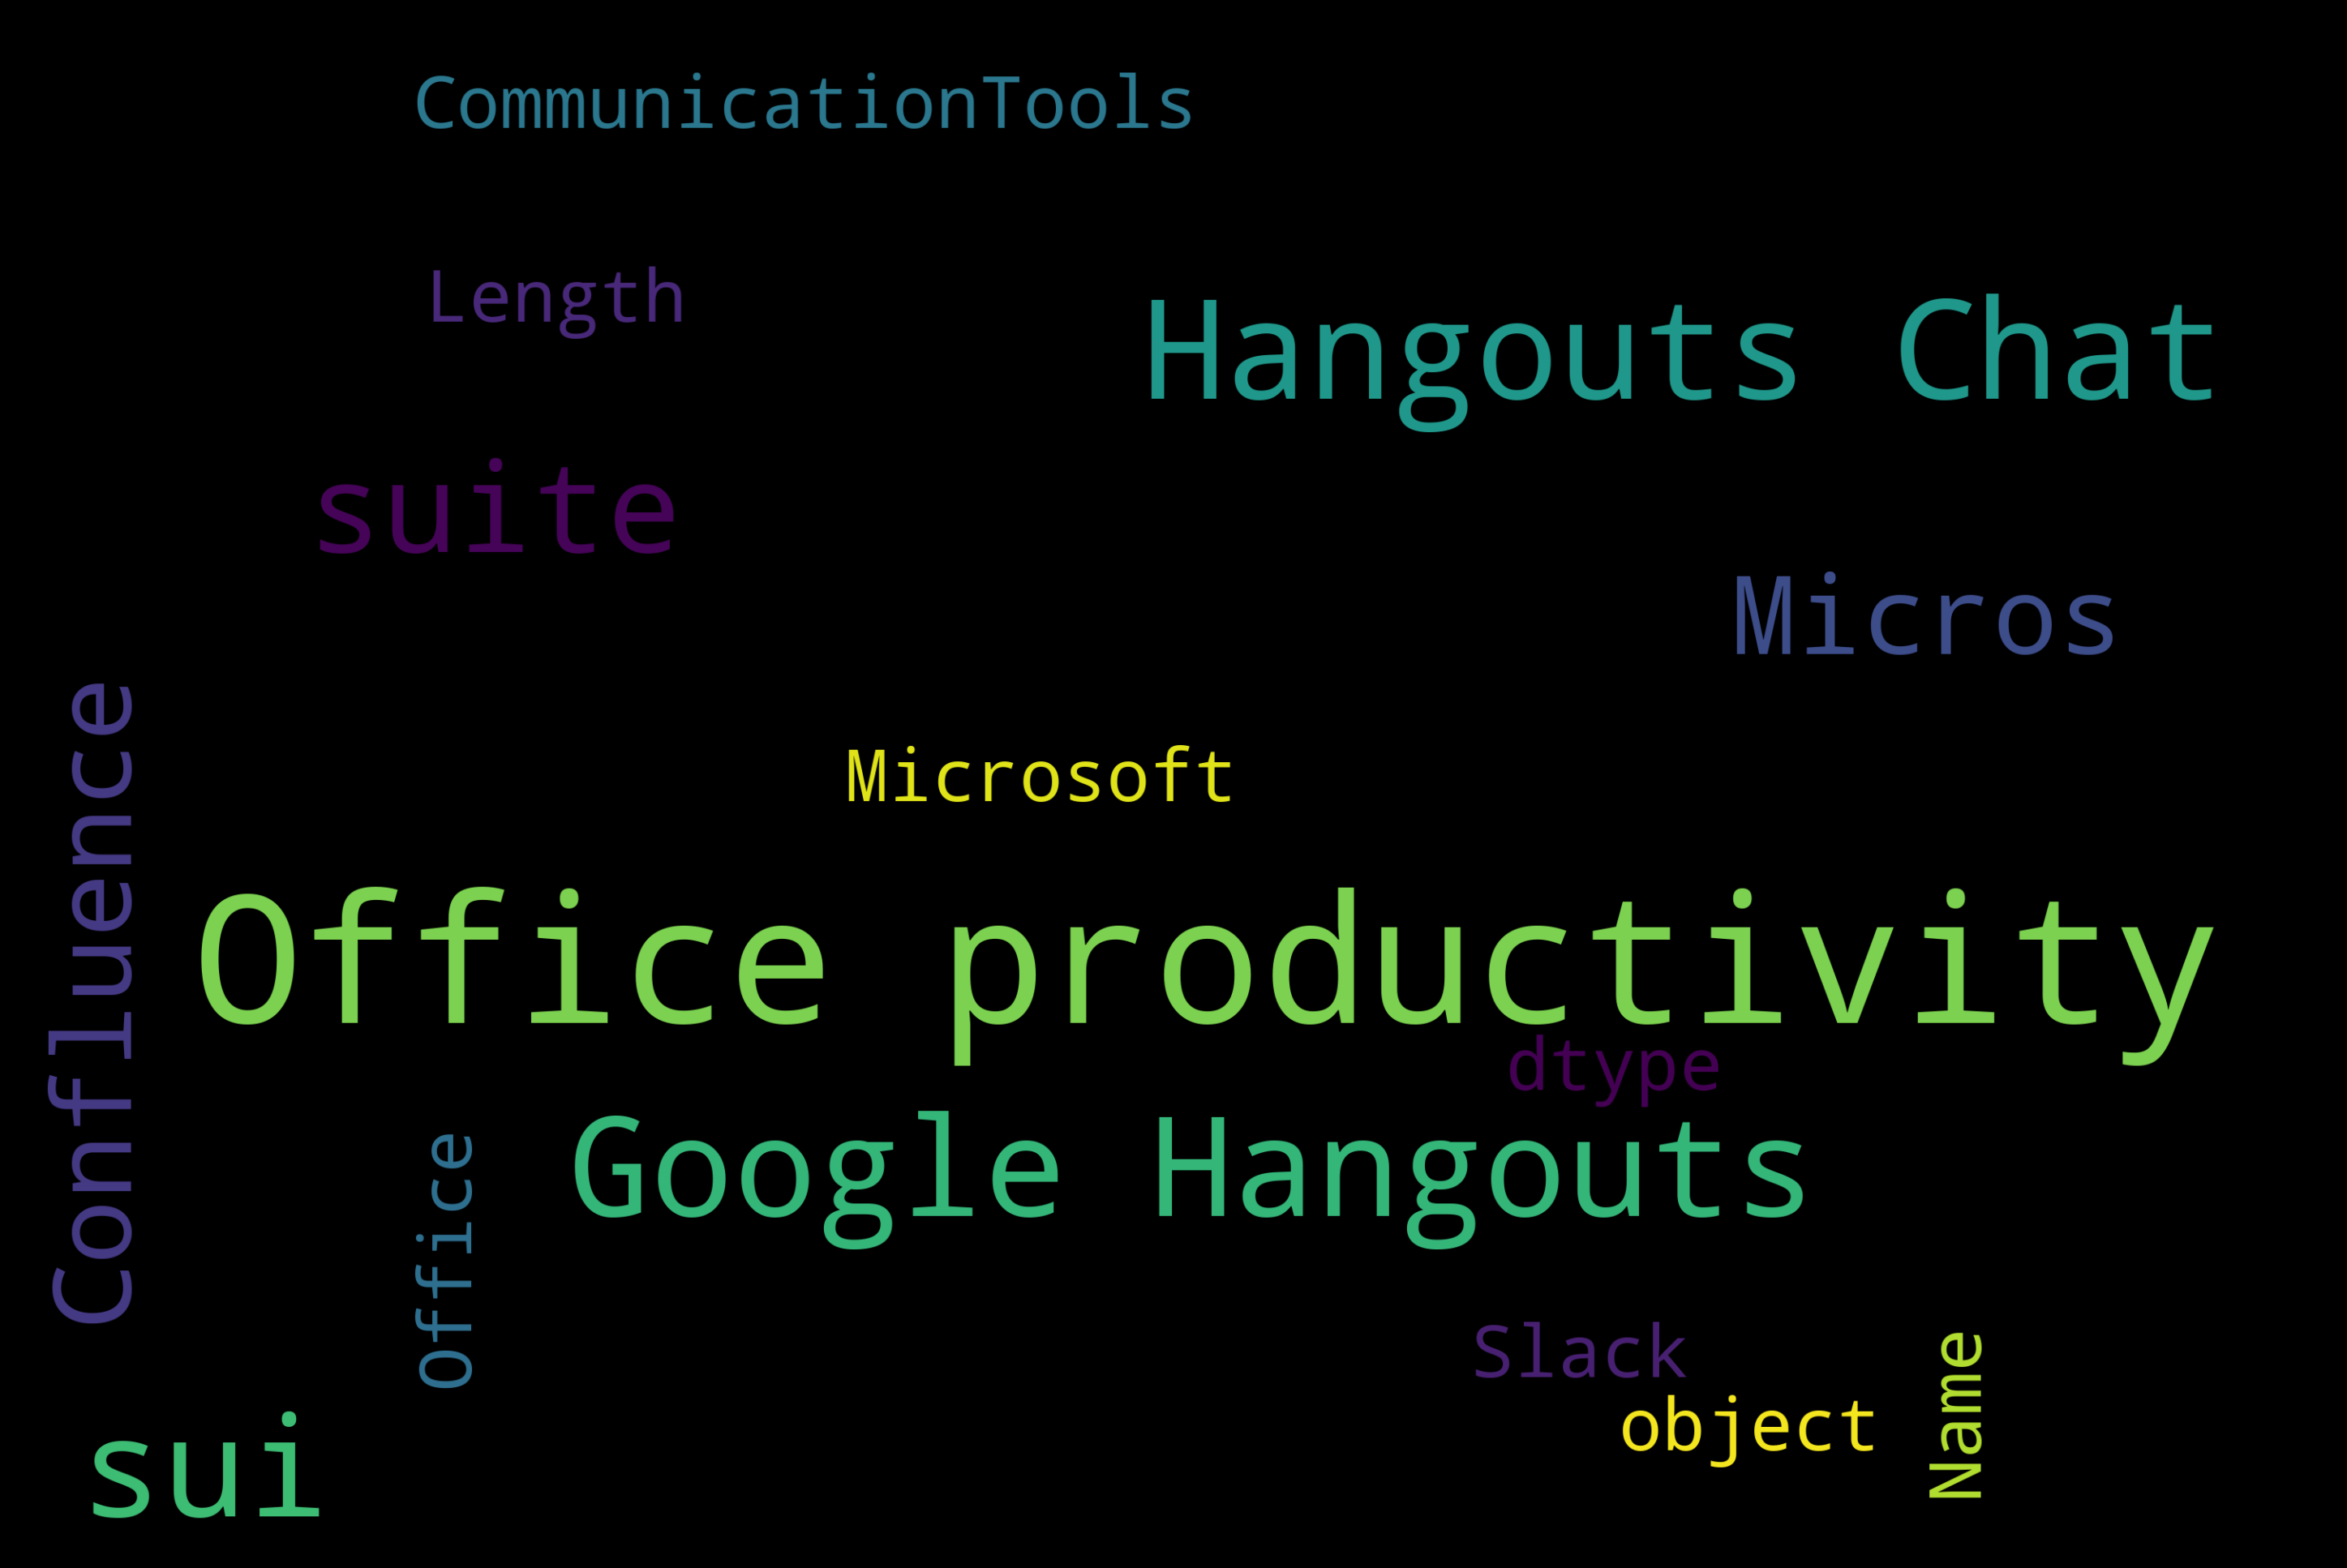

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_stack.CommunicationTools
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [52]:
df_stack['Gender']

0               Male
1               Male
2               Male
3               Male
4               Male
            ...     
98850    Female;Male
98851    Female;Male
98852    Female;Male
98853    Female;Male
98854    Female;Male
Name: Gender, Length: 98855, dtype: object

In [ ]:
age_order = ['Under 18 years old','18 - 24 years old','25 - 34 years old',
             '35 - 44 years old','45 - 54 years old','55 - 64 years old', 
             '65 years or older']

In [ ]:
df_stack['Age'] = df_stack['Age'].replace({'Fewer than 10 employees': 'Fewer than 10', 
                                                           '10 to 19 employees': '10 to 19', '20 to 99 employees': '20 to 99', 
                                                           '100 to 499 employees': '100 to 499', '500 to 999 employees':'500 to 999',
                                                           '1,000 to 4,999 employees':'1,000 to 4,999', '5,000 to 9,999 employees':'5,000 to 9,999',
                                                           '10,000 or more employees': '10,000 or more'})  

In [41]:
%matplotlib inline

import pandas as pd
import networkx as nx

# Ignore matplotlib warnings
import warnings

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(df_stack, source='Respondent', target='Country') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

clubs = [node for node in g.nodes() if node in df_stack.Country.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df_stack.Country.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, node_color='lightblue')

people = [node for node in g.nodes() if node in df_stack.Respondent.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in df_stack.Respondent.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

club_dict = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=club_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

KeyboardInterrupt: 

<Figure size 864x864 with 0 Axes>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [32]:
df_stack.fillna(method ='ffill', inplace = True)

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_stack)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

ValueError: could not convert string to float: 'Yes'